In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM , Activation , Dense , Dropout , Input , Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping


In [2]:
data = pd.read_csv("SMSSpamCollection.txt" , sep='\t' , names = ["label" , "message"])
data.head(10)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


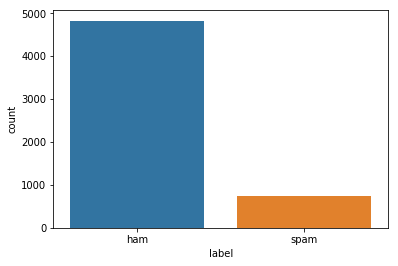

In [6]:
sns.countplot(data['label'])

In [15]:
x = data.message
y = data.label

In [16]:
l = LabelEncoder()
y = l.fit_transform(y)
y = y.reshape(-1,1)

In [17]:
y

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [18]:
train_x , test_x , train_y , test_y = train_test_split(x,y,test_size = 0.15 , random_state = 0)
train_x



3061             K..k...from tomorrow onwards started ah?
5444    Good morning. At the repair shop--the ONLY rea...
4738    Nt only for driving even for many reasons she ...
2267    <Forwarded from 88877>FREE entry into our £250...
4453    I've told you everything will stop. Just dont ...
1285                         But if she.s drinkin i'm ok.
4329    Congrats! 2 mobile 3G Videophones R yours. cal...
3167    HOT LIVE FANTASIES call now 08707509020 Just 2...
195     How are you doing? Hope you've settled in for ...
3616    I enjoy watching and playing football and bask...
598     You have an important customer service announc...
4661    You call him and tell now infront of them. Cal...
14                    I HAVE A DATE ON SUNDAY WITH WILL!!
2636         Tiwary to rcb.battle between bang and kochi.
3373               And now electricity just went out fml.
4995           My drive can only be read. I need to write
3266    44 7732584351, Do you want a New Nokia 3510i c...
1979    No I'm

In [23]:
tok = Tokenizer(num_words=1000)
tok.fit_on_texts(train_x)
sequences = tok.texts_to_sequences(train_x)
sequence_matrix = sequence.pad_sequences(sequences , maxlen=150)

In [24]:
sequence_matrix

array([[  0,   0,   0, ..., 162, 576, 342],
       [  0,   0,   0, ...,  30,  42, 453],
       [  0,   0,   0, ...,   7, 107, 320],
       ...,
       [  0,   0,   0, ..., 139, 364, 347],
       [  0,   0,   0, ...,  19,  11, 348],
       [  0,   0,   0, ...,  36,  20, 109]])

In [25]:
def RNN():
    inputs = Input(name = 'inputs' , shape = [150])
    layer = Embedding(1000 , 50 , input_length=150)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256 , name = 'FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1 , name = 'out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs = inputs , output = layer)
    
    return model

In [26]:
model = RNN()
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 150, 50)           50000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257 

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("ac...)`
  # Remove the CWD from sys.path while we load stuff.


In [27]:
model.compile(loss = 'binary_crossentropy' , optimizer=RMSprop() , metrics=['accuracy'])

In [28]:
history = model.fit(sequence_matrix , train_y , batch_size=128 , epochs=10)

E:\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
E:\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/10
4736/4736 [==============================] - 19s 4ms/step - loss: 0.2734 - accuracy: 0.8967
Epoch 2/10
4736/4736 [==============================] - 15s 3ms/step - loss: 0.0610 - accuracy: 0.9842
Epoch 3/10
4736/4736 [==============================] - 15s 3ms/step - loss: 0.0412 - accuracy: 0.9894
Epoch 4/10
4736/4736 [==============================] - 15s 3ms/step - loss: 0.0329 - accuracy: 0.9907
Epoch 5/10
4736/4736 [==============================] - 15s 3ms/step - loss: 0.0245 - accuracy: 0.9928
Epoch 6/10
4736/4736 [==============================] - 15s 3ms/step - loss: 0.0202 - accuracy: 0.9943
Epoch 7/10
4736/4736 [==============================] - 16s 3ms/step - loss: 0.0157 - accuracy: 0.9956
Epoch 8/10
4736/4736 [==============================] - 15s 3ms/step - loss: 0.0126 - accuracy: 0.9964
Epoch 9/10
4736/4736 [==============================] - 16s 3ms/step - loss: 0.0117 - accuracy: 0.9970
Epoch 10/10
4736/4736 [==============================] - 16s 3ms/step - l

In [29]:
test_sequence = tok.texts_to_sequences(test_x)
test_sequence_matrix = sequence.pad_sequences(test_sequence , 150)

In [30]:
acc = model.evaluate(test_sequence_matrix , test_y)

836/836 [==============================] - 1s 2ms/step


In [31]:
print(acc)

[0.06669875301052748, 0.9856459498405457]


In [48]:
sample = ["Go until jurong point, crazy.. Available only ..."]

In [49]:
text = tok.texts_to_sequences(sample)
text = sequence.pad_sequences(text , maxlen=150)

In [50]:
result = model.predict(text)

In [51]:
result

array([[6.155655e-05]], dtype=float32)

In [52]:
if result > 0.5:
    print("Spam")
else:
    print("Ham")

Ham
